**Assignment 7**
Demonstrate  the mean  adapted  GMM for  an arbitrary  set  of  data
Find the % of  unadapted  Gaussians in the  class  dependent  model  compared  with the  class independent  UBM 


In [1]:
#Import recommonended libraries
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import copy

#Uncomment this if you want to display your [graphs] within the notebook in a proper format.
%matplotlib inline
#Uncomment this if you want to display your graphs in backend


import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
from numpy.random import randn
import glob
import sys

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [ ]:
from GMM import GMM

In [2]:

class opt:
    def normalize_meanvector(weight, var, mean_vec):
        normalize_mean = np.zeros(np.shape(mean_vec), dtype=np.float32)
        [NUMBER_OF_GAUSSIAN, FEATURE_ORDER] = np.shape(mean_vec)
        for ii in range(0, NUMBER_OF_GAUSSIAN):
            normalize_mean[ii, :] = np.sqrt(weight[ii]) * \
                            (1 / np.sqrt(var[ii, :])) * mean_vec[ii, :]
        return normalize_mean

Sample1 shape (500, 2)
Sample2 shape (500, 2)


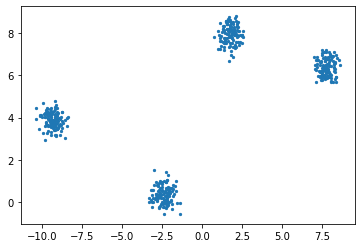

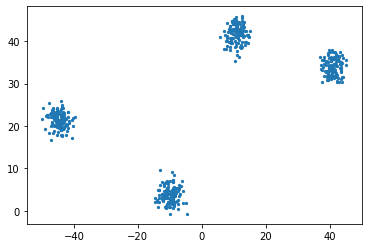

In [3]:
# ===========================
# parameters    
# ===========================
NUMBER_OF_SAMPLE = 500
FEATURE_ORDER = 2
NUMBER_OF_GAUSSIAN = 4
RAND_VAL = 5
RAND_MEAN = 2
SCALING_FACTOR = 0.01



#Synthetic Data Generation first method

K=4 # Step1:Choose the Number of clusters

from sklearn.datasets.samples_generator import make_blobs
Data, y_true = make_blobs(n_samples=NUMBER_OF_SAMPLE, n_features=FEATURE_ORDER, centers=NUMBER_OF_GAUSSIAN,
                       cluster_std=0.4, random_state=20)




# generating Data samples
sample1 = Data
sample2 = Data * RAND_VAL + RAND_MEAN


print("Sample1 shape", sample1.shape)
print("Sample2 shape", sample2.shape)

#Plot 2D
plt.scatter(sample1[:, 0], sample1[:, 1], s=5)
plt.show()

plt.scatter(sample2[:, 0], sample2[:, 1], s=5)
plt.show()

In [4]:
# training init GMM to create UBM
#GMM_train_by_sample1 = GMM(, )

gmm_ubm = GMM(k=NUMBER_OF_GAUSSIAN, max_iter=50)
gmm_ubm.fit(sample1)

TypeError: __init__() got an unexpected keyword argument 'k'

In [ ]:
gmm_ubm.weights.shape

In [ ]:
probability = gmm_ubm.predict_proba(sample2);probability

##Posterior Probability of Noisy Dataset :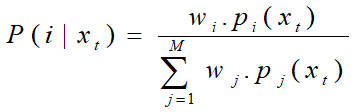

In [ ]:
# Posterior probabilities for K NUMBER_OF_GAUSSIAN
probability = gmm_ubm.predict_proba(sample2)
print(probability.shape)

In [ ]:
probability

ni: 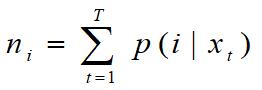

In [ ]:
#N summation for K NUMBER_OF_GAUSSIAN
n_i = np.sum(probability, axis=0)
print(n_i)

Mean of Posterior Probaility on Noisy Image: 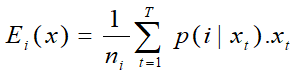

In [ ]:

E = np.zeros((FEATURE_ORDER, NUMBER_OF_GAUSSIAN), dtype=np.float32)
print('Size of E', E.shape)

for ii in range(0, NUMBER_OF_GAUSSIAN):
    probability_gauss = np.tile(probability[:, ii],(FEATURE_ORDER, 1)).T * sample2
    E[:, ii] = np.sum(probability_gauss, axis=0) / n_i[ii]

print('probability_gauss: ', probability_gauss.shape)
print('Size of E', E.shape)

Data dependent adaptation coefficient: 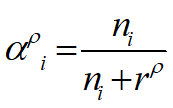

In [ ]:
alpha = n_i / (n_i + SCALING_FACTOR)
print('alpha: ', alpha)

In [ ]:
old_mean = copy.deepcopy(np.vstack(gmm_ubm.mu))
print('old_mean: ', old_mean )
new_mean = np.zeros((NUMBER_OF_GAUSSIAN, FEATURE_ORDER), dtype=np.float32)
print('new mean: ', new_mean )

Sufficient statistics Mean Updation: 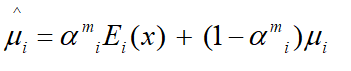

In [ ]:
np.vstack(gmm_ubm.mu)

In [ ]:
# (12)
for ii in range(0, NUMBER_OF_GAUSSIAN):
    new_mean[ii,:] = (alpha[ii] * E[:,ii]) + ((1 - alpha[ii]) * old_mean[ii, :])
print('new mean: ', new_mean )

In [ ]:
# normalize
weight = gmm_ubm.weights
var = gmm_ubm.sigma
print('weight: ', weight )
print('var: ', np.vstack(var))

In [ ]:
# get GMM supervector
norm_mean = opt.normalize_meanvector(weight, var, new_mean)
super_vector = np.reshape(norm_mean, NUMBER_OF_GAUSSIAN * FEATURE_ORDER)
print('norm_mean: ', norm_mean )
print('super_vector: ', super_vector )



norm_mean_old = opt.normalize_meanvector(weight, var,old_mean)
super_vector_old = np.reshape(norm_mean_old, NUMBER_OF_GAUSSIAN * FEATURE_ORDER)
print('norm_mean_old: ', norm_mean_old )
print('super_vector_old: ', super_vector_old )

In [ ]:
plt.figure()
plt.plot(super_vector / np.sum(np.abs(super_vector)))
plt.plot(super_vector_old / np.sum(np.abs(super_vector_old)), 'r')
plt.legend(['adapted GMM supervector', 'original supervector'])

In [ ]:
# ===========================
#Verification
# ===========================
sample2_many = sample2


testGMM_many = GMM(k=NUMBER_OF_GAUSSIAN, max_iter=50)
testGMM_many.fit(sample2_many)


testGMM_many_mean = np.vstack(testGMM_many.mu)
print('testGMM_many_mean', testGMM_many_mean)

plt.figure()
plt.plot(old_mean[:, 0], old_mean[:, 1], 'bo')
plt.plot(new_mean[:, 0], new_mean[:, 1], 'ro')
plt.plot(testGMM_many_mean[:, 0], testGMM_many_mean[:, 1], 'ko')
plt.legend(['before adapted ', 'after adapted', 'true'])
plt.grid(True)
plt.show()